In [ ]:
"""
# 正态性检验，
# 利用观测数据判断总体是否服从正态分布的检验称为正态性检验

# 直方图检验、QQ图判断、K-S检验

"""

In [1]:
# coding=utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

       value
0  10.138334
1  10.571132
2  10.319710
3  10.754256
4  10.035354


d:\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


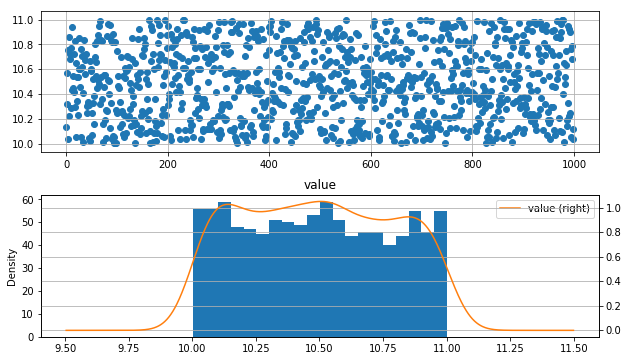

In [2]:
# 直方图检验
s = pd.DataFrame(np.random.rand(1000)+10,columns=['value'])
print(s.head())

# 创建随机数据
fig = plt.figure(figsize=(10,6))# 散点图
fig.show()
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index,s.value)

plt.grid()

ax2 = fig.add_subplot(2,1,2)
s.hist(bins=20,ax=ax2)
s.plot(kind='kde',secondary_y=True,ax=ax2)
plt.grid()

       value
0  10.899903
1  10.055220
2  10.848393
3  10.093658
4  10.748566
均值为：10.51  标准差为：0.29
----
         value
353  10.002334
534  10.003125
373  10.003325
12   10.003469
322  10.003925
   index      value
0    353  10.002334
1    534  10.003125
2    373  10.003325
3     12  10.003469
4    322  10.003925
   index      value       p         q
0    353  10.002334 -0.0005 -1.747316
1    534  10.003125  0.0005 -1.744607
2    373  10.003325  0.0015 -1.743922
3     12  10.003469  0.0025 -1.743427
4    322  10.003925  0.0035 -1.741866


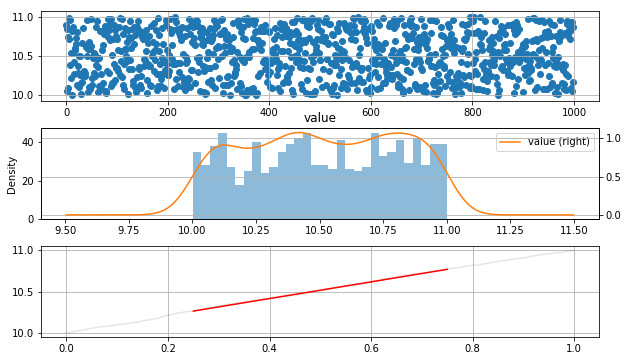

In [8]:
# QQ图
# 通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正太分布的分布数为横坐标，样本值为坐标值的散点图
# 参考直线：  四分之一分为点和四分之三分为点这两点确定，查看数电是否落在这条线的附近

# 绘图思路
# ①在做好数据清洗后，对数据进行排序（次序统计量）
# ②排序后，计算出每个数据对应的百分位p(i)，即第i个数据x(i)即为p(i)分位数，其中p(i)=(i-0.5)/n    (pi有多重算法，这里以最常用方法为主)
# ③绘制直方图 + QQ图 直方图作为参考

s = pd.DataFrame(np.random.rand(1000)+10,columns=['value'])
print(s.head())

# 创建随机数据
mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f  标准差为：%0.2f'%(mean,std))
print('----')
# 计算均值，标准差
s.sort_values(by='value',inplace=True)
print(s.head())
s_r = s.reset_index(drop=False)
print(s_r.head())
s_r['p'] = (s_r.index -0.5)/len(s_r)
s_r['q'] = (s_r['value'] - mean)/std 
print(s_r.head())

# 绘制数据分析图
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(s.index,s.value)
plt.grid()

# 绘制直方图
ax2 = fig.add_subplot(3,1,2)
s.hist(bins=30,alpha=0.5,ax=ax2)
s.plot(kind='kde',secondary_y=True,ax=ax2)
plt.grid()

# 绘制QQ图
st = s_r['value'].describe()
x1,y1 = 0.25, st['25%']
x2,y2 = 0.75, st['75%']
ax3 = fig.add_subplot(3,1,3)
ax3.plot(s_r['p'],s_r['value'],'k',alpha=0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

实测D值为 0.15965714285714283


,血糖浓度,样本浓度,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


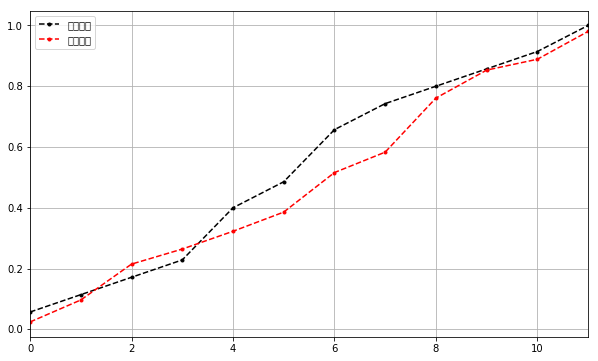

In [9]:
# K-S检验
# 以样本数据的累计频数分布与特定的理论分布比较 ，如果两者差距小，则推论样本分布取自于特定分布。

# D ---->  两个分布的差值的绝对值的最大值   >D(n,α)
# p>0.05 接受服从来自某分布


data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
df = pd.DataFrame(data,columns=['value']) 
u = df['value'].mean()
std = df['value'].std()

s = df['value'].value_counts().sort_index()
 
df_s = pd.DataFrame({'血糖浓度':s.index,'样本浓度':s.values})
df_s['累计次数'] = df_s['样本浓度'].cumsum()  # 累加和

df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u ) /std       # 将不标准，变成标准
df_s['理论分布'] = [0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]# 查阅正态分布表


df_s['D'] = np.abs(df_s['累计频率']-df_s['理论分布'])
dmax = df_s['D'].max()
print('实测D值为',dmax)
fig = plt.figure(figsize=(10,6))
df_s['累计频率'].plot(style='--k.')
df_s['理论分布'].plot(style='--r.')
plt.legend(loc='upper left',labels=(u'累计频率', u'理论分布'))# 乱码
plt.grid()
df_s
 
# 另一种方法，：调用封装好的函数

# from scipy import stats
# scipy 是一个高级的科学计算库，和numpy联系密切
# print(stats.kstest(df['value'],'norm',(u,std)))  # norm正态分布
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布，均值与标准差）
# 结果返回两个值：statistic  ->D值，pvalue  --> P值
# p>0.05为正态分布